In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


THEME


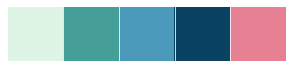

In [2]:
import os               
import numpy                   as np
import seaborn as sb
import pandas                  as pd 
import matplotlib.pyplot       as plt
import seaborn                 as sns
import plotly.express          as ex
import plotly.graph_objs       as go
import plotly.offline          as pyo
import scipy.stats             as stats
#import pymc3                   as pm
#import theano.tensor           as tt
from plotly.subplots           import make_subplots
from sklearn.preprocessing     import StandardScaler
from sklearn.decomposition     import TruncatedSVD,PCA
from sklearn.ensemble          import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree              import DecisionTreeClassifier
from sklearn.linear_model      import LinearRegression,LogisticRegressionCV
from sklearn.svm               import SVC
from sklearn.metrics           import mean_squared_error,r2_score
from sklearn.pipeline          import Pipeline
from sklearn.model_selection   import cross_val_score,train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.manifold          import Isomap,TSNE
from sklearn.feature_selection import mutual_info_classif
from tqdm.notebook             import tqdm
from scipy.stats               import ttest_ind
from sklearn.model_selection import train_test_split as tts

from imblearn.over_sampling import SMOTE
from collections import Counter
#%pip install tune_sklearn
#from tune_sklearn              import TuneGridSearchCV


sns.set_style('darkgrid')
pyo.init_notebook_mode()
%matplotlib inline


plt.rc('figure',figsize=(18,11))
sns.set_context('paper',font_scale=2)

theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]
print('THEME')
sns.palplot(sns.color_palette(theme))

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DataAirTrain.csv')
df

Barometer       Temp     NO  PM-10     RH  Radiation     WindDir  \
0     1010.280000  25.550000  18.57  18.12  98.55       0.01  188.880000   
1     1011.210000  25.170000  11.61  17.25  99.62      32.83  194.240000   
2     1012.360000  25.860000   8.79  12.04  97.46     311.73  108.600000   
3     1012.660000  27.670000  11.33  10.91  88.45     532.91  119.740000   
4     1012.780000  29.140000   5.50   8.91  77.99     610.51  116.880000   
...           ...        ...    ...    ...    ...        ...         ...   
3409  1006.197202  24.618810   2.31  12.86  62.53        NaN  177.290079   
3410  1004.847083  27.431410   2.30  10.30  62.61        NaN  131.708012   
3411  1004.401372  24.187061   2.47  10.48  62.80        NaN  148.633002   
3412  1009.252225  30.123856   2.48  11.45  63.54        NaN  211.588451   
3413  1004.019334  27.841429   2.55  14.54  70.41        NaN  109.182176   

        SO2     NOx    NO2  ...      CO  PM-1     O3  Wind Spd    TSP  \
0     19.17  68.232  78.45  ...  461.82  3.43 -17.17  1.480000  31.02   
1     13.49  48.492  58.17  ...  595.40  3.43  -3.70  1.550000  31.13   
2      6.68  30.564  34.38  ...  553.42  2.43   3.09  1.240000  21.29   
3      5.77  30.996  31.16  ...  446.55  2.14   8.60  1.780000  19.24   
4      5.72  23.676  28.68  ...  435.10  1.87  33.08  1.560000  18.48   
...     ...     ...    ...  ...     ...   ...    ...       ...    ...   
3409  70.69   2.448   0.29  ...  122.13  2.98  91.97  0.994953  23.62   
3410  72.00   2.400   0.23  ...  114.50  3.01  90.53  1.789547  18.27   
3411  73.61   2.520   0.17  ...  110.68  2.98  88.60  1.083361  17.82   
3412  73.22   2.388    NaN  ...  122.13  3.07  88.27  1.401751  18.58   
3413  77.79   4.584   3.27  ...  232.82  3.70  76.07  1.305240  24.03   

                    time  WinDir1  Temp1     ASKQ  Wind Spd (sai)  
0     14/4/2019 07:00:00      NaN    NaN      NaN             NaN  
1     14/4/2019 08:00:00      NaN    NaN      NaN             NaN  
2     14/4/2019 09:00:00      NaN    NaN      NaN             NaN  
3     14/4/2019 10:00:00      NaN    NaN      NaN             NaN  
4     14/4/2019 11:00:00      NaN    NaN      NaN             NaN  
...                  ...      ...    ...      ...             ...  
3409       5/9/2019 2:00   103.96  30.69  1002.97            2.46  
3410       5/9/2019 3:00    84.25  30.64  1002.61            2.57  
3411       5/9/2019 4:00    74.20  30.63  1002.26            3.08  
3412       5/9/2019 5:00    91.78  30.46  1002.10            2.75  
3413       5/9/2019 6:00   249.09  29.01  1002.14            1.58  

[3414 rows x 22 columns]

<AxesSubplot:title={'center':'Missing Values Per Feature'}>

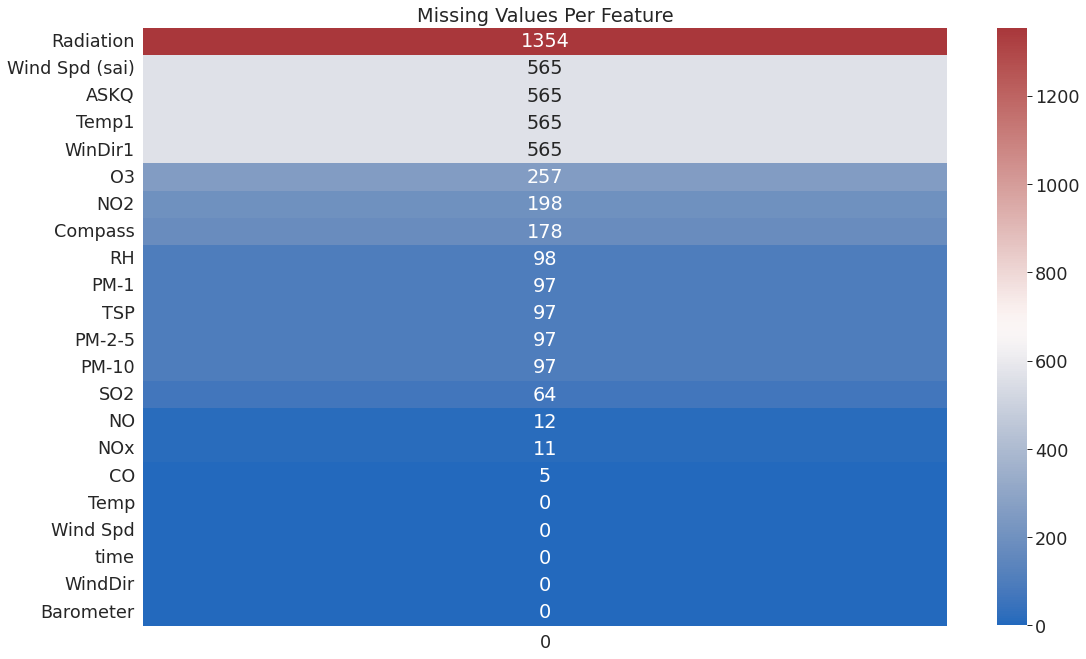

In [4]:
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [6]:
df.describe()

Barometer         Temp           NO       PM-10           RH  \
count  3414.000000  3414.000000  3402.000000  3317.00000  3316.000000   
mean   1006.931484    27.326785    41.181843    22.31356    84.252120   
std       3.166125     2.386315   186.621533    12.33052     9.923797   
min     994.780000    21.670000     0.180000     0.55000    50.660000   
25%    1004.771244    25.618173     2.480000    14.41000    77.560000   
50%    1007.096835    27.358156     3.400000    19.92000    85.995000   
75%    1009.229289    28.986497     9.067500    27.21000    91.382500   
max    1013.440000    33.590000  1629.990000   185.52000   100.000000   

         Radiation      WindDir          SO2          NOx          NO2  ...  \
count  2060.000000  3414.000000  3350.000000  3403.000000  3216.000000  ...   
mean    244.595641   138.917089    27.050833    59.409362    40.841085  ...   
std     228.458331    38.694921    27.613784   147.661660    27.700482  ...   
min       0.010000    56.130000    -0.450000     0.168000     0.020000  ...   
25%      46.590000   111.633337     6.935000    15.150000    19.117500  ...   
50%     177.010000   135.857574    15.550000    28.464000    37.045000  ...   
75%     390.797500   164.121121    38.280000    47.994000    55.542500  ...   
max     920.890000   314.810000   187.570000  1333.932000   184.470000  ...   

            PM-2-5           CO         PM-1           O3     Wind Spd  \
count  3317.000000  3409.000000  3317.000000  3157.000000  3414.000000   
mean      8.945107   449.168721     4.292424    51.621365     1.534289   
std       6.036418   312.272391     3.132022    86.301332     0.656974   
min       0.060000     7.630000     0.060000   -17.170000     0.340000   
25%       5.350000   236.630000     2.500000    28.430000     1.020000   
50%       7.440000   362.580000     3.570000    41.750000     1.476564   
75%      11.210000   561.050000     5.280000    60.050000     1.980546   
max     112.990000  2545.720000    55.550000  2104.400000     3.520000   

               TSP      WinDir1        Temp1         ASKQ  Wind Spd (sai)  
count  3317.000000  2849.000000  2849.000000  2849.000000     2849.000000  
mean     40.010241   145.153833    29.559077  1002.913917        1.320863  
std      21.310778    61.347600     2.769017     3.334864        0.766117  
min       0.650000    37.220000    22.700000   988.940000        0.250000  
25%      26.390000   107.050000    27.590000  1000.760000        0.760000  
50%      35.700000   122.310000    29.600000  1002.860000        1.150000  
75%      48.450000   154.550000    31.380000  1005.080000        1.700000  
max     269.180000   318.010000    36.920000  1012.460000       14.070000  

[8 rows x 21 columns]

Total   Percent
Radiation        1354  0.396602
Wind Spd (sai)    565  0.165495
ASKQ              565  0.165495
Temp1             565  0.165495
WinDir1           565  0.165495

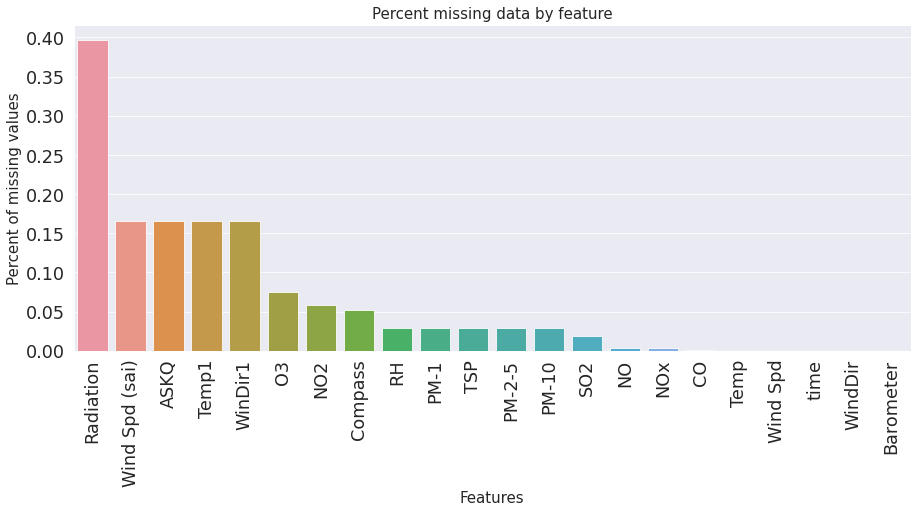

In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [8]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
#
lst = ['CO', 'NOx','NO','SO2','PM-10','PM-2-5','TSP','PM-1','RH','Compass', 'NO2','O3','WinDir1','Temp1','ASKQ','Wind Spd (sai)','Radiation']
data = df[['Barometer','Wind Spd','Temp','WindDir']]
for a in lst:
    data = pd.concat([data, df[a]], axis=1)
    x_train = data[data[a].notnull()].drop(columns=a)
    y_train = data[data[a].notnull()][a]
    x_test = data[data[a].isnull()].drop(columns=a)
    y_test = data[data[a].isnull()][a]
    linreg.fit(x_train, y_train)
    predicted = linreg.predict(x_test)
    data[a][data[a].isnull()] = predicted
    df[a][df[a].isnull()] = predicted
    print("done")

<ipython-input-8-e915faf7850e>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-e915faf7850e>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-e915faf7850e>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-e915faf7850e>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

done
done
done
done
done
done
done


<ipython-input-8-e915faf7850e>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-e915faf7850e>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-e915faf7850e>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-e915faf7850e>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

done
done
done
done
done
done
done
done
done
done


<ipython-input-8-e915faf7850e>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-e915faf7850e>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-e915faf7850e>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-e915faf7850e>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3414 entries, 0 to 3413
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Barometer       3414 non-null   float64
 1   Temp            3414 non-null   float64
 2   NO              3414 non-null   float64
 3   PM-10           3414 non-null   float64
 4   RH              3414 non-null   float64
 5   Radiation       3414 non-null   float64
 6   WindDir         3414 non-null   float64
 7   SO2             3414 non-null   float64
 8   NOx             3414 non-null   float64
 9   NO2             3414 non-null   float64
 10  Compass         3414 non-null   float64
 11  PM-2-5          3414 non-null   float64
 12  CO              3414 non-null   float64
 13  PM-1            3414 non-null   float64
 14  O3              3414 non-null   float64
 15  Wind Spd        3414 non-null   float64
 16  TSP             3414 non-null   float64
 17  time            3414 non-null   o

In [9]:
df.head(10)

Barometer   Temp     NO  PM-10     RH  Radiation  WindDir    SO2     NOx  \
0    1010.28  25.55  18.57  18.12  98.55       0.01   188.88  19.17  68.232   
1    1011.21  25.17  11.61  17.25  99.62      32.83   194.24  13.49  48.492   
2    1012.36  25.86   8.79  12.04  97.46     311.73   108.60   6.68  30.564   
3    1012.66  27.67  11.33  10.91  88.45     532.91   119.74   5.77  30.996   
4    1012.78  29.14   5.50   8.91  77.99     610.51   116.88   5.72  23.676   
5    1011.23  29.41  13.53  12.03  78.18     343.47   119.90   8.68  47.448   
6    1009.65  28.91   7.02  13.06  81.86     124.37   124.78   9.71  41.784   
7    1009.69  28.87   4.49  10.76  83.69     254.85   138.83   6.47  16.872   
8    1009.71  28.83   4.67  12.42  84.64     209.75   136.05   3.11  12.240   
9    1008.63  28.51   4.06  14.29  85.59      79.30   124.73   1.88  14.172   

     NO2  ...      CO  PM-1     O3  Wind Spd    TSP                time  \
0  78.45  ...  461.82  3.43 -17.17      1.48  31.02  14/4/2019 07:00:00   
1  58.17  ...  595.40  3.43  -3.70      1.55  31.13  14/4/2019 08:00:00   
2  34.38  ...  553.42  2.43   3.09      1.24  21.29  14/4/2019 09:00:00   
3  31.16  ...  446.55  2.14   8.60      1.78  19.24  14/4/2019 10:00:00   
4  28.68  ...  435.10  1.87  33.08      1.56  18.48  14/4/2019 11:00:00   
5  53.60  ...  408.38  2.49  14.88      1.40  23.25  14/4/2019 12:00:00   
6  54.71  ...  450.37  2.60   6.70      1.61  27.16  14/4/2019 13:00:00   
7  19.55  ...  362.58  2.18   7.36      2.65  21.91  14/4/2019 14:00:00   
8  12.02  ...  301.52  2.07   3.21      2.26  24.97  14/4/2019 15:00:00   
9  15.98  ...  343.50  1.99  -0.35      1.45  29.58  14/4/2019 16:00:00   

      WinDir1      Temp1         ASKQ  Wind Spd (sai)  
0  124.553489  26.570572  1004.557967        0.780691  
1  134.956598  26.069825  1004.730840        0.779759  
2  141.069288  26.552454  1004.515630        0.985526  
3  138.287399  28.677137  1003.877532        1.365120  
4  137.280406  30.667563  1003.175303        1.724824  
5  124.279581  30.847159  1002.982009        1.592629  
6  126.644499  29.777010  1003.425952        1.431936  
7  141.131719  29.499672  1003.841335        1.615800  
8  145.955810  29.372801  1003.823366        1.600891  
9  146.431080  29.059004  1003.756540        1.471999  

[10 rows x 22 columns]

In [ ]:
%cd /content/drive/MyDrive
df.to_csv("DataAir.csv")

/content/drive/MyDrive


<AxesSubplot:>

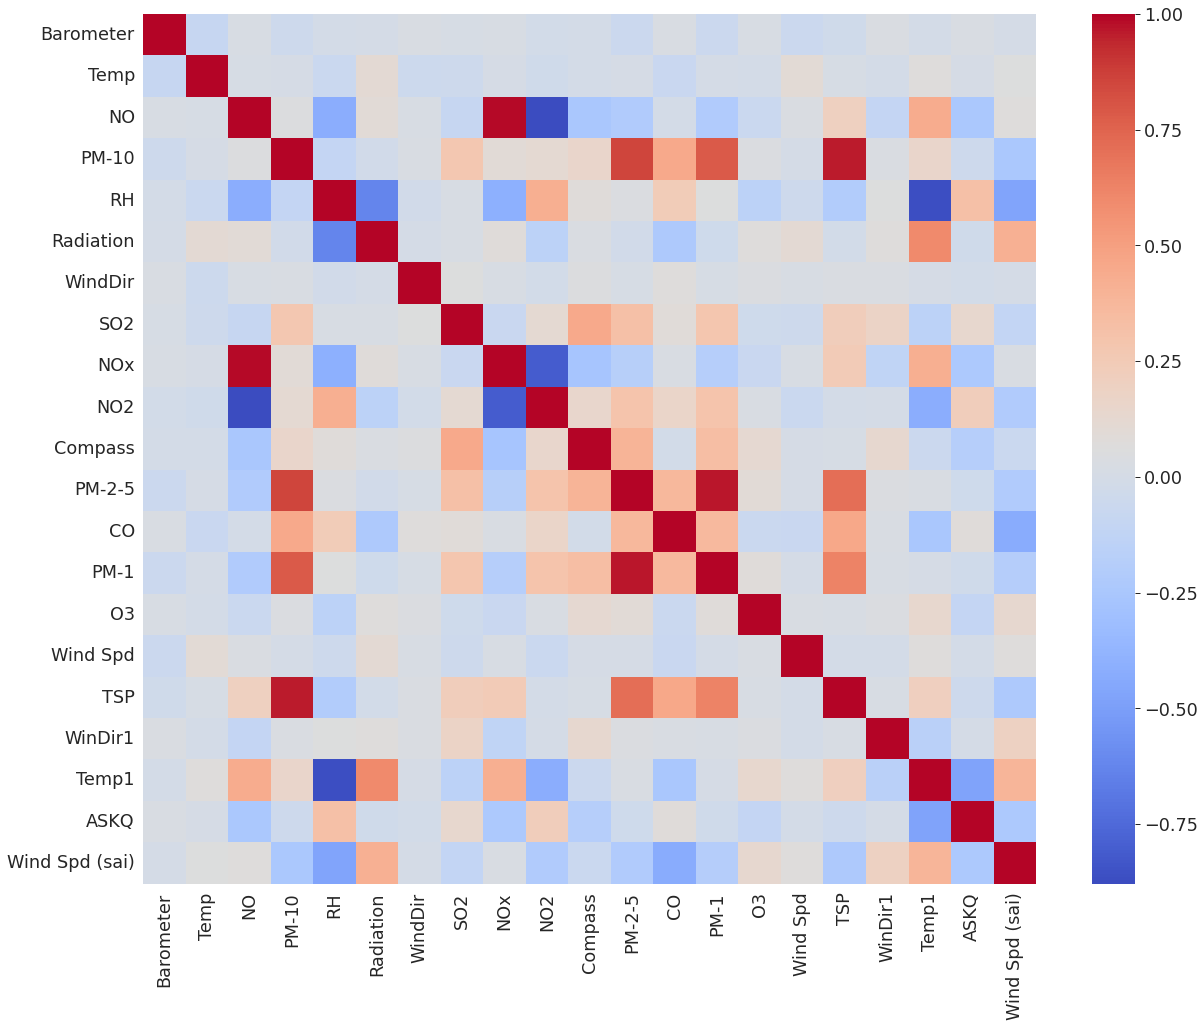

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot= False, cmap='coolwarm')

<Figure size 1296x792 with 0 Axes>

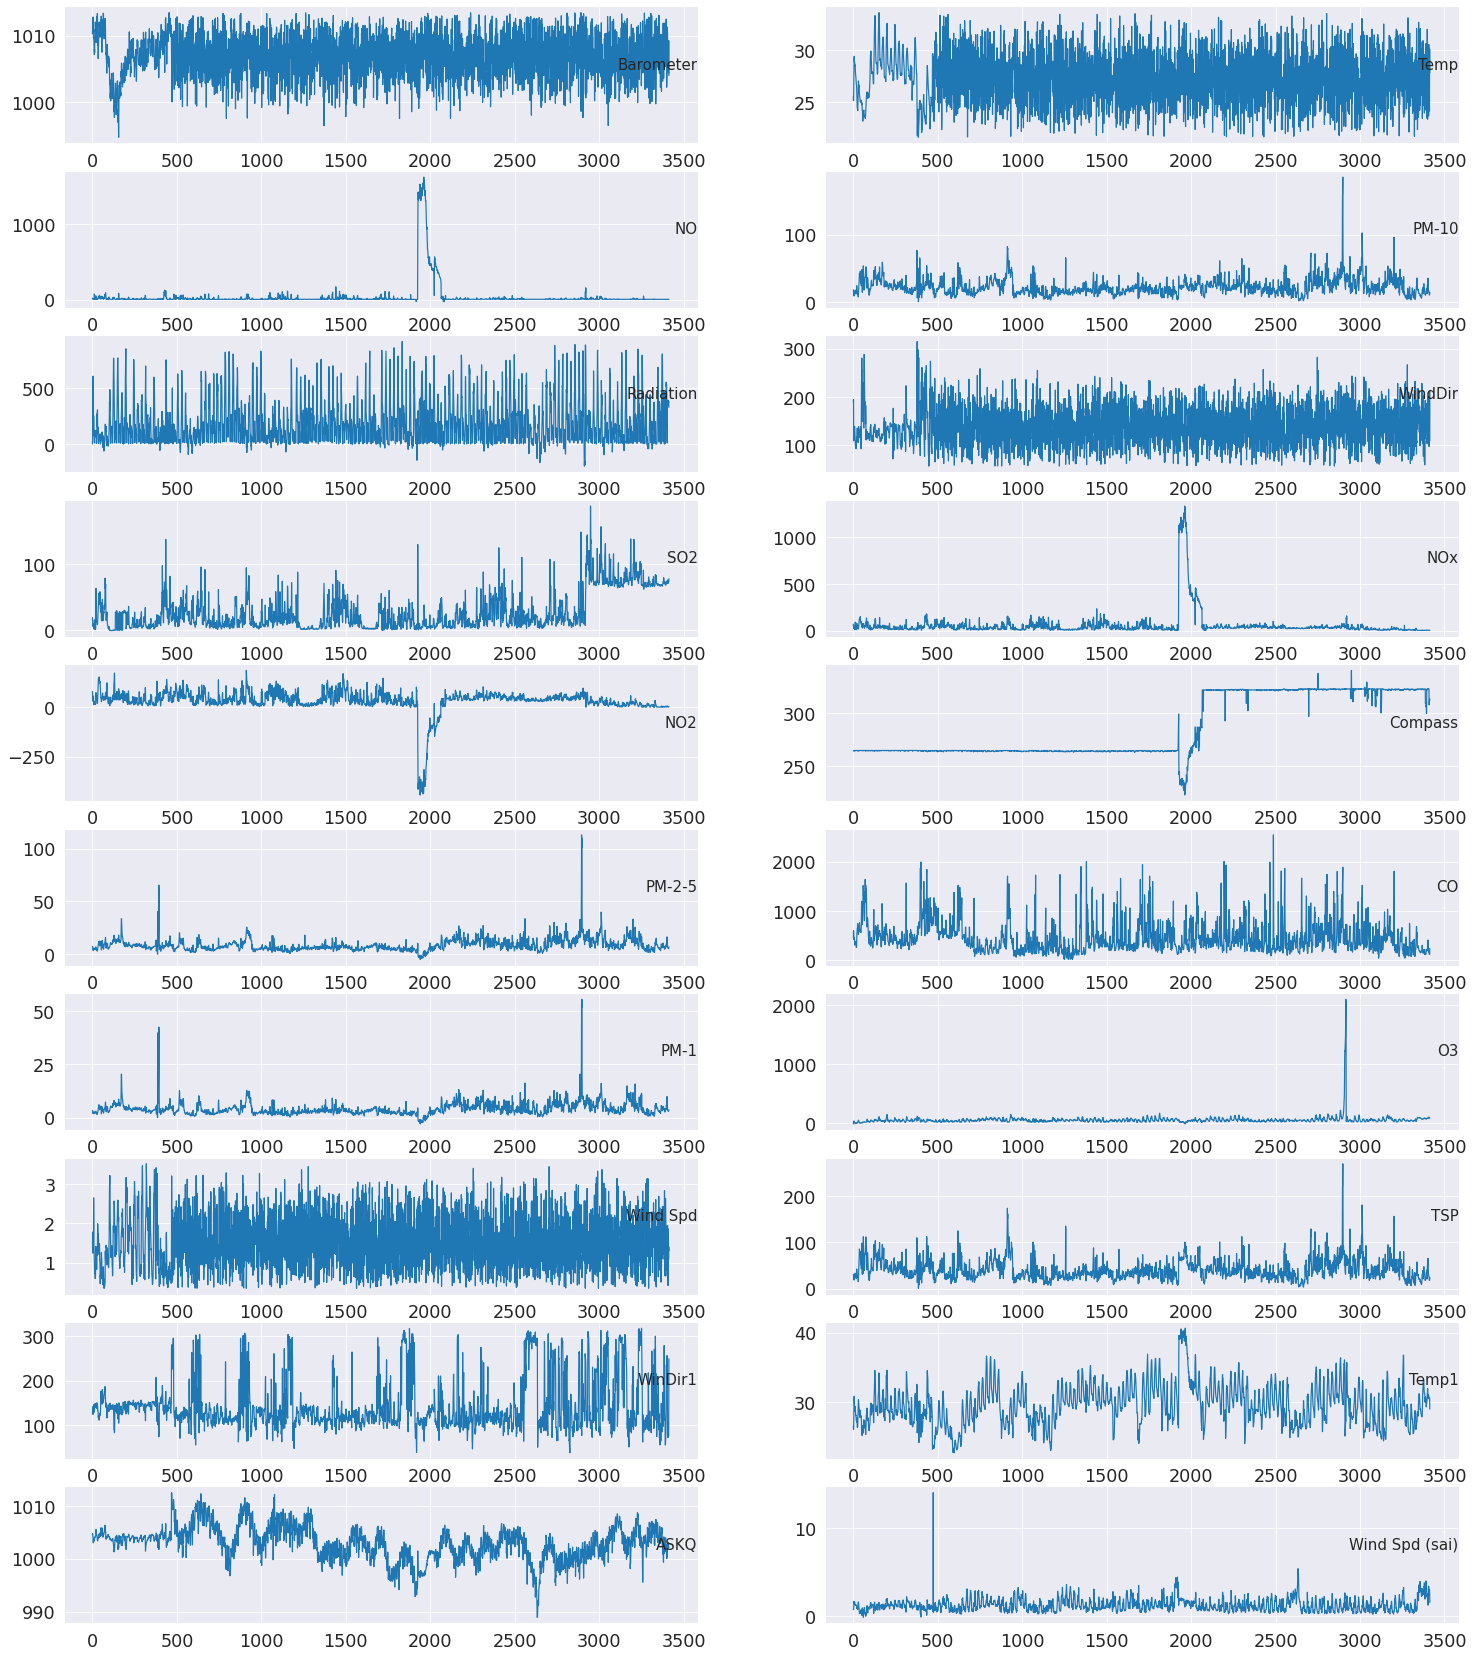

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset

values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13,14,15,16,18,19,20,21]
i = 1
# plot each column
pyplot.figure()
plt.figure(figsize=(25,60))
for group in groups:
	pyplot.subplot(len(groups), 2, i)
	pyplot.plot(values[:, group])
	pyplot.title(df.columns[group], y=0.5, loc='right', fontsize = 15)
	i += 1
pyplot.show()